___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.10.12


In [4]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [5]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [6]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
df = pd.read_csv("/content/1-Churn_Modelling.csv")

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum().any()

False

In [12]:
df.duplicated().sum().any()

False

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [14]:
df.describe(include="O").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [15]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

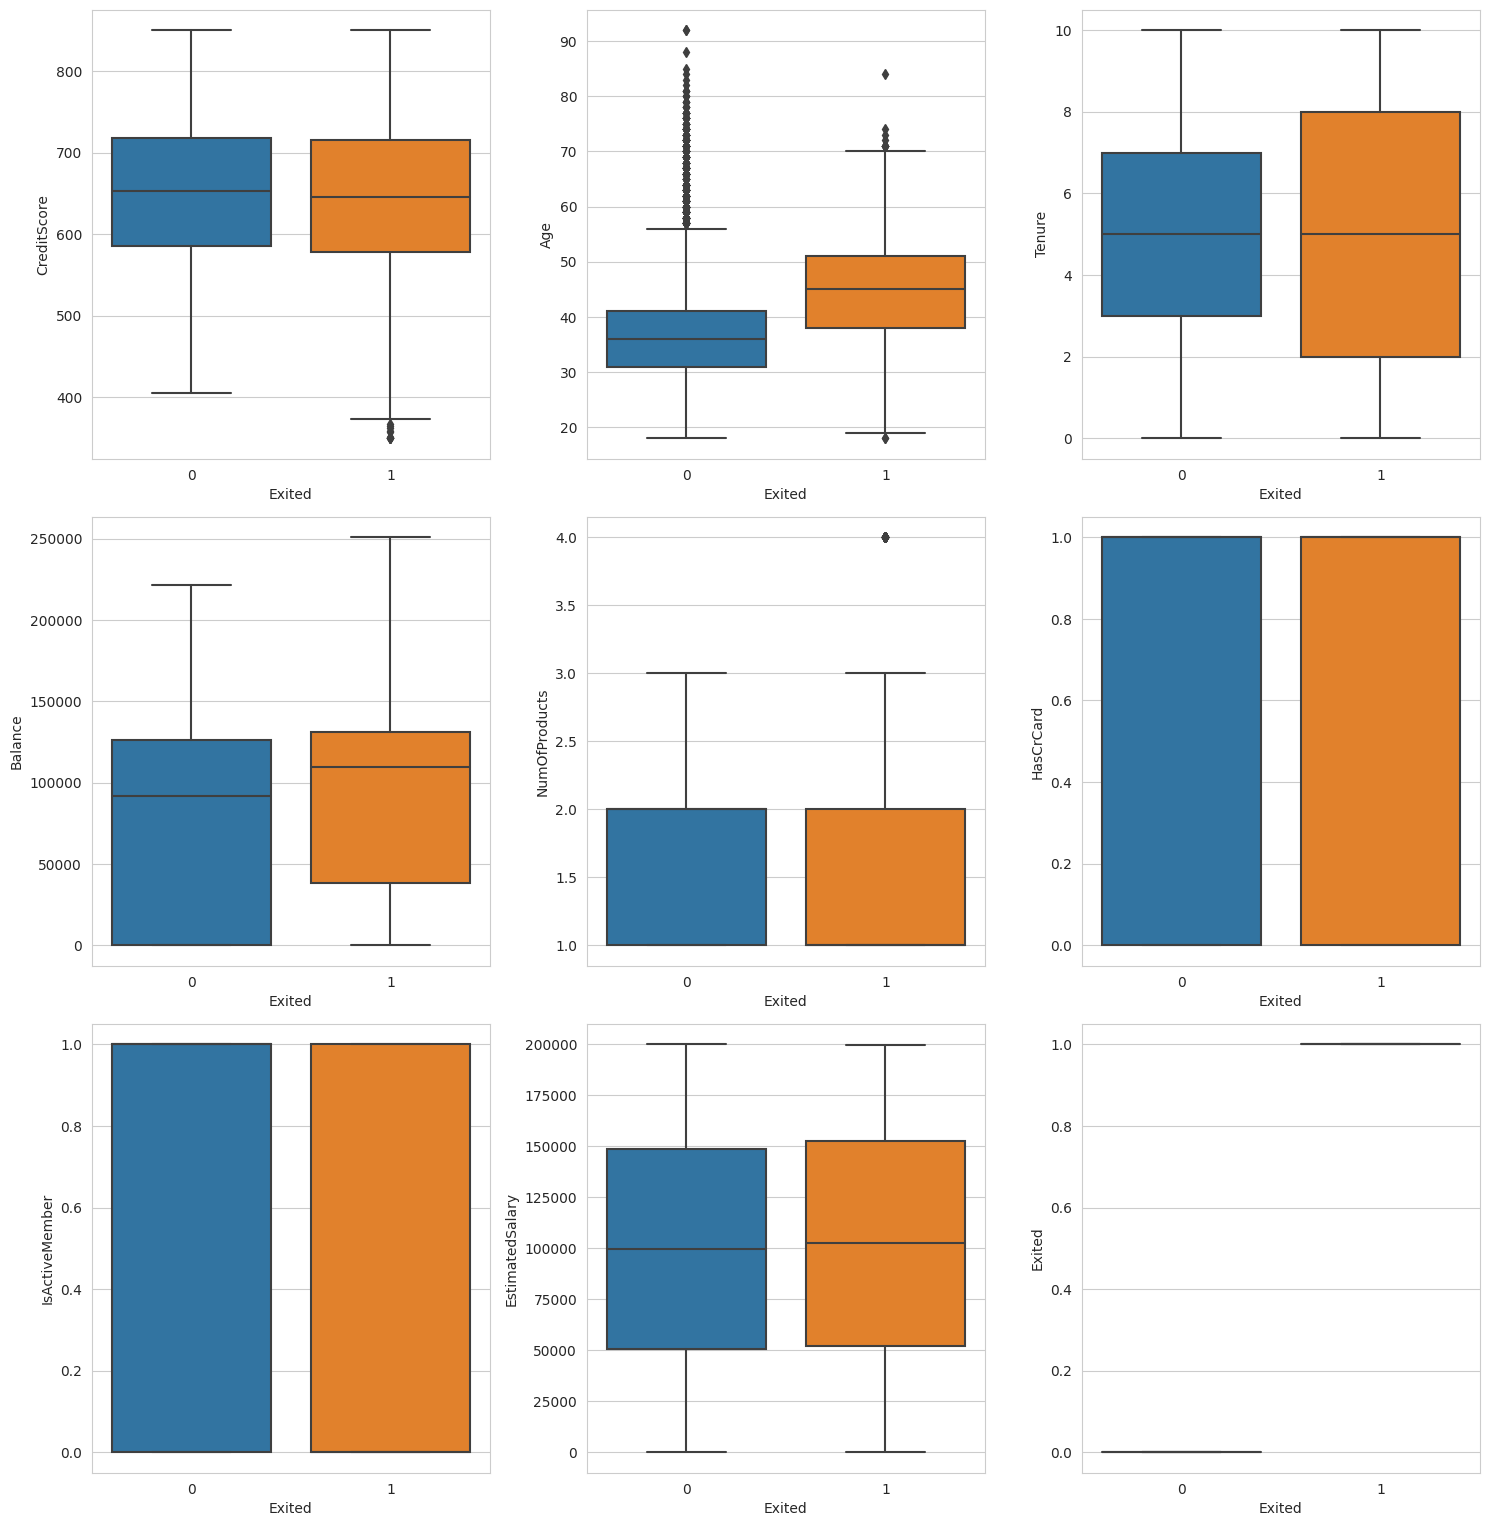

In [19]:
# Here we could see the most distinguishing features and potential outliers

fig = plt.figure(figsize=(15,20))

for i, col in enumerate(df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=df[col], data=df)

plt.tight_layout();

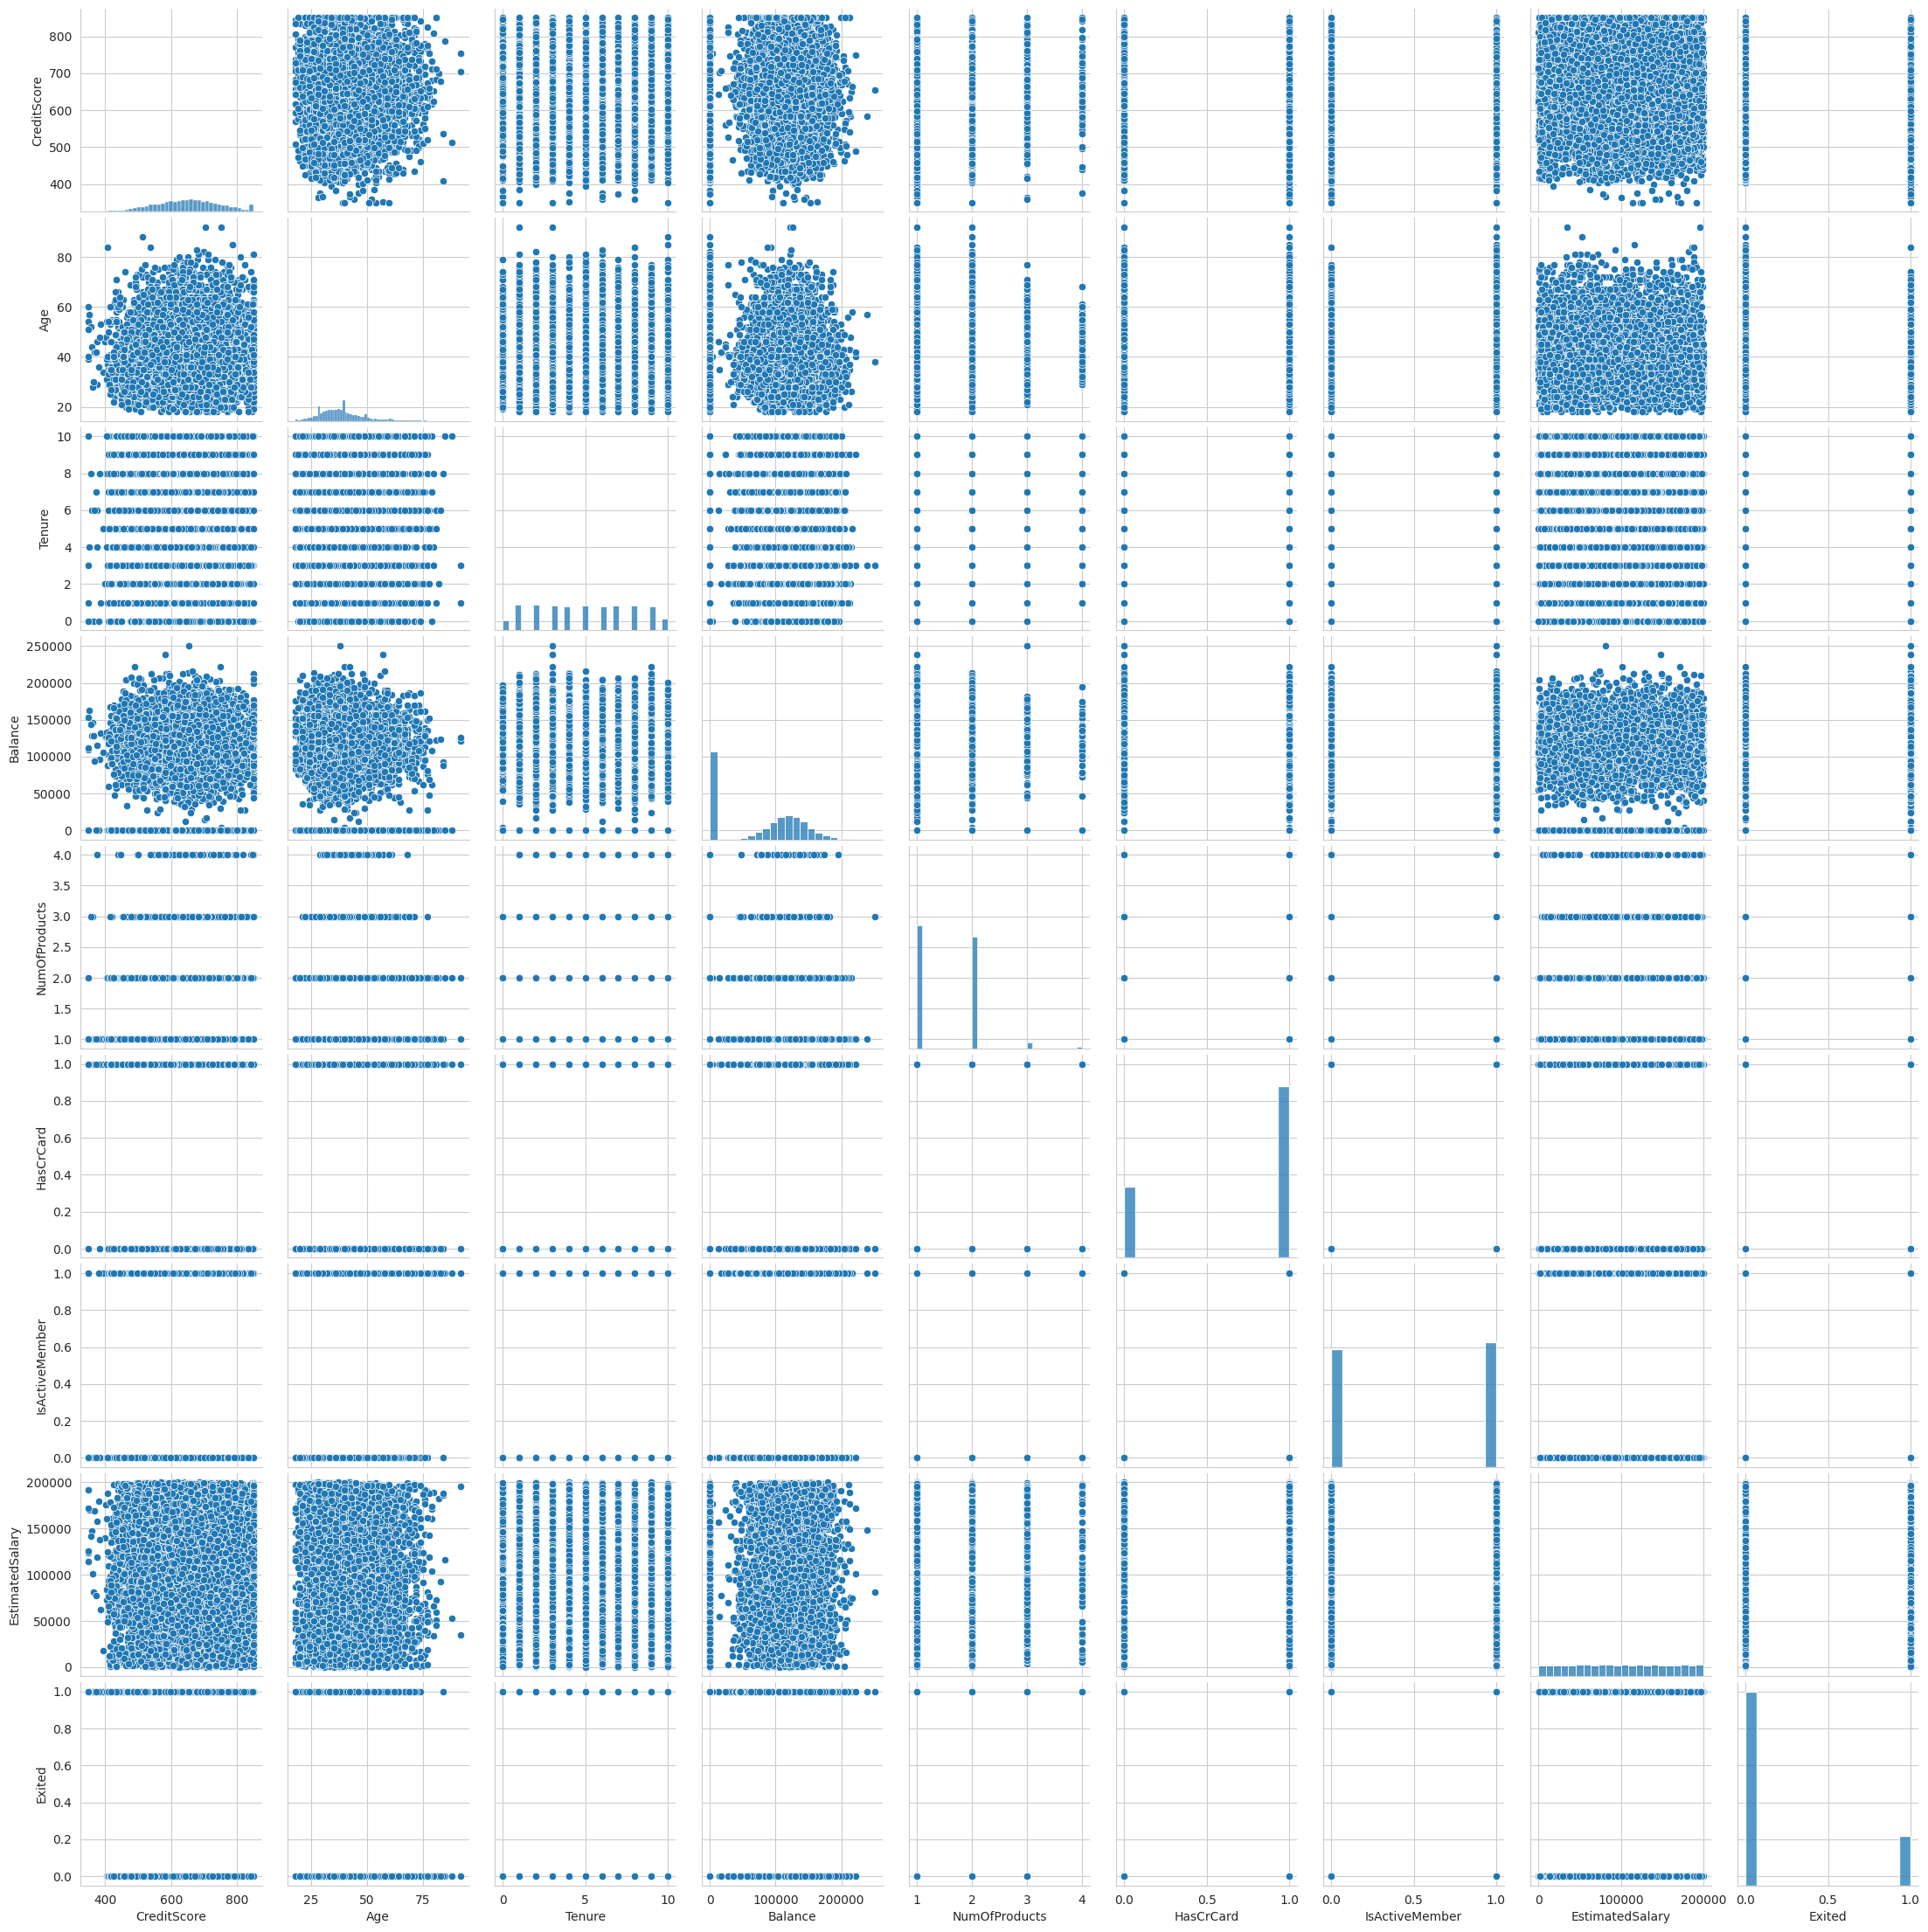

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
# df.corr()

<ipython-input-22-dd3b5ebf7393>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="Blues")


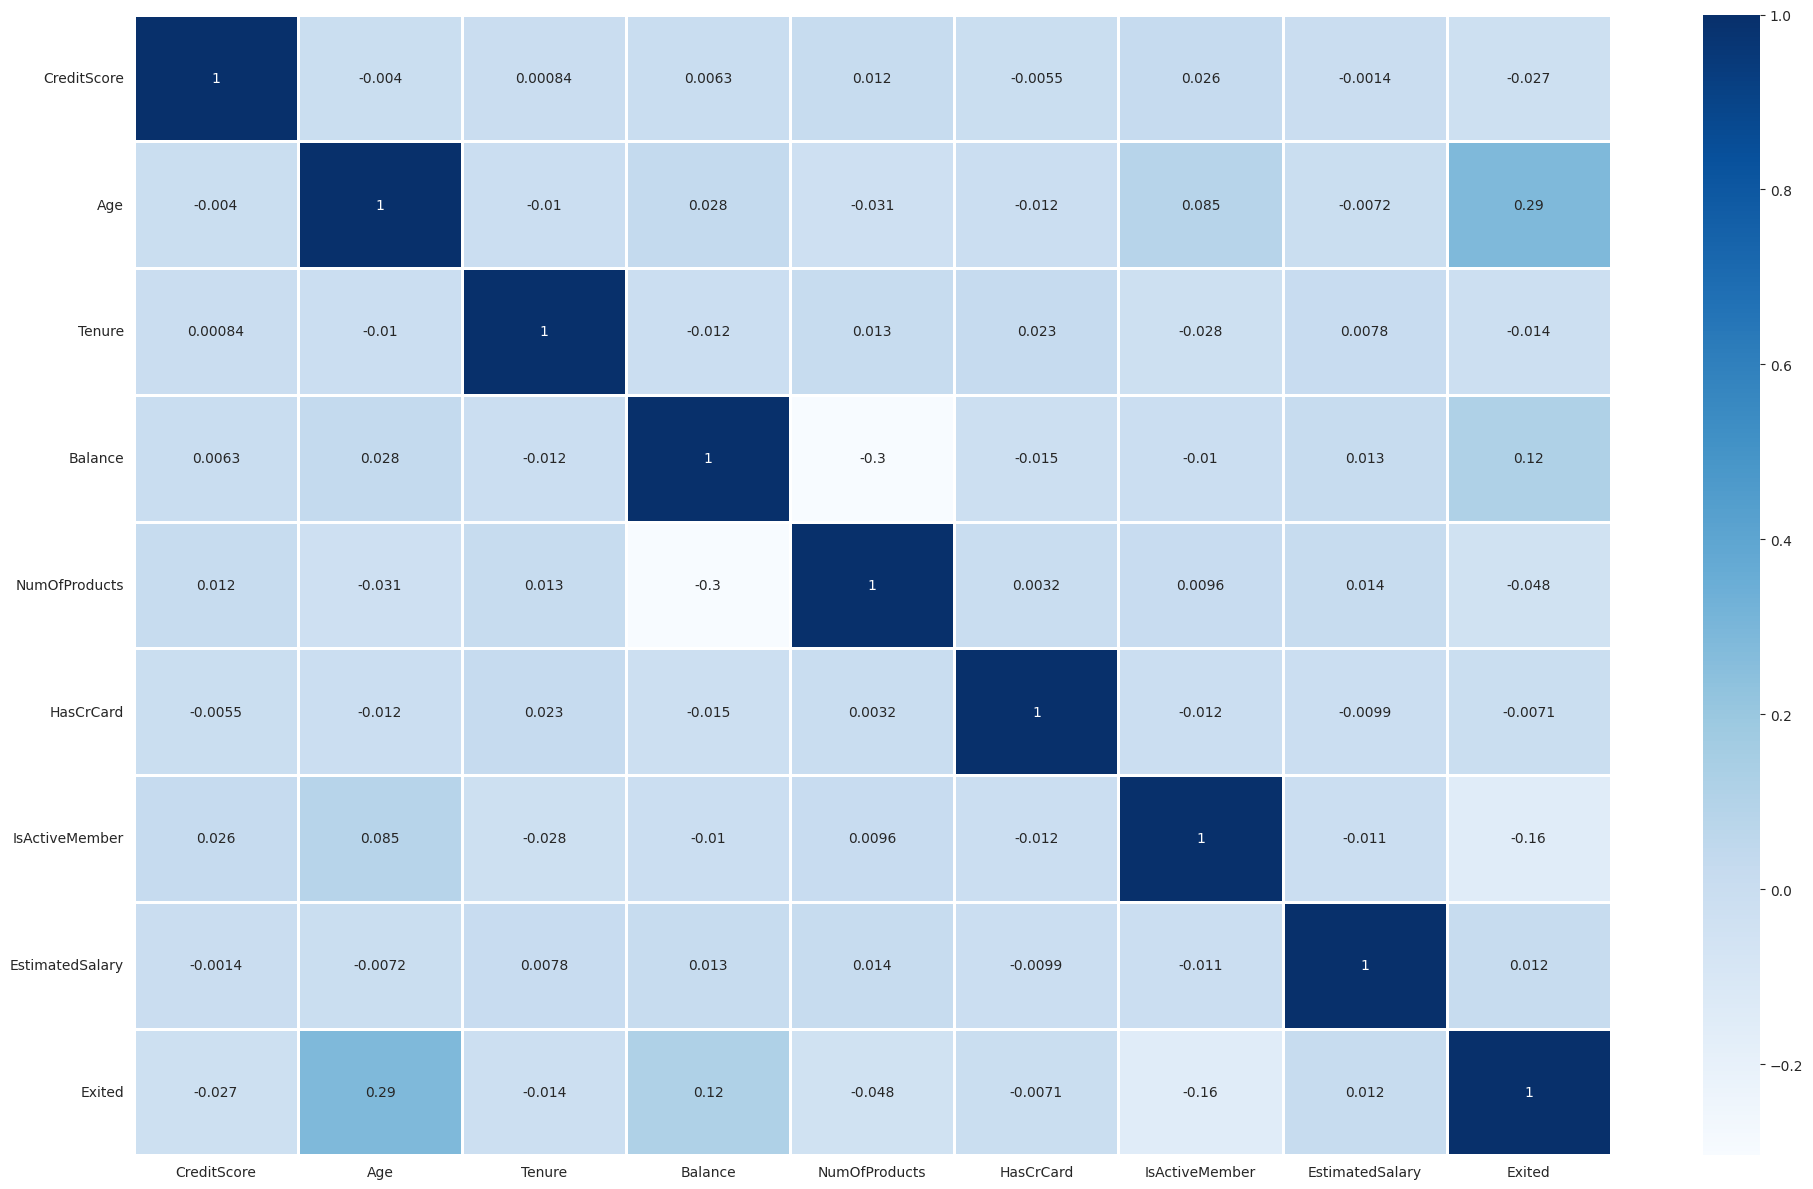

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="Blues")
plt.tight_layout()

# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
columns_to_encode = ['Geography', 'Gender']

In [24]:
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [27]:
df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000,1.000,0.000
1,608,41,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000,1.000,0.000
2,502,42,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000,1.000,0.000
3,699,39,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000,1.000,0.000
4,850,43,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000,1.000,0.000


In [29]:
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [33]:
X_train.shape

(7000, 13)

In [34]:
X_test.shape

(3000, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [36]:
# First way to create the model using the Sequential API

model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=36, activation="relu"),
        Dense(units=18, activation="relu"),
        Dense(units=9, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 36) dtype=float32, numpy=
 array([[-0.24978647, -0.0486306 ,  0.1834884 , -0.08194435, -0.34428337,
          0.12465346,  0.28431043, -0.31101343, -0.21622893, -0.28335926,
          0.15973237, -0.22796714, -0.02515146,  0.25843564,  0.0119881 ,
         -0.31857935,  0.05259663, -0.21903665,  0.11474049,  0.1361615 ,
          0.11765918, -0.19484754, -0.30968297,  0.2171795 , -0.20965588,
         -0.24679744,  0.25048265,  0.06606385, -0.21369101,  0.06840113,
          0.28103158,  0.17668948, -0.3373454 , -0.34295502,  0.281962  ,
          0.03479844],
        [-0.2664052 , -0.271176  , -0.3297813 ,  0.25228968,  0.26935002,
          0.27624783,  0.28303728, -0.27531117, -0.18450584, -0.00157899,
          0.2509474 , -0.27399617, -0.26303717, -0.183268  ,  0.04100159,
          0.03709492, -0.22738364,  0.0304628 , -0.17664874, -0.2229247 ,
         -0.12545729, -0.1979884 ,  0.08372471, -0.176016  , -0.02688688,
         -0.31490147,

In [39]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Recall'])

In [40]:
#from tensorflow.keras.callbacks import EarlyStopping

In [41]:
#early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=100, restore_best_weights=True)

In [42]:
#model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=128 ,epochs=1000 ,callbacks=early_stop)
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=50, epochs=100)

Epoch 1/100
126/126 [==============================] - 2s 4ms/step - loss: 0.5626 - recall: 0.1314 - val_loss: 0.4544 - val_recall: 0.0000e+00
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4253 - recall: 0.1856 - val_loss: 0.3972 - val_recall: 0.2500
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.3841 - recall: 0.3690 - val_loss: 0.3790 - val_recall: 0.3264
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 0.3658 - recall: 0.4018 - val_loss: 0.3706 - val_recall: 0.3819
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.3575 - recall: 0.4324 - val_loss: 0.3679 - val_recall: 0.3333
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 0.3527 - recall: 0.4393 - val_loss: 0.3684 - val_recall: 0.4236
Epoch 7/100
126/126 [==============================] - 0s 3ms/step - loss: 0.3467 - recall: 0.4523 - val_loss: 0.3677 - val_recall: 0.3542
Epoch 8/100
126/126 [==

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 36) dtype=float32, numpy=
 array([[-6.13816008e-02,  7.42703751e-02,  2.81374782e-01,
         -7.33408853e-02, -5.04611790e-01,  1.07246928e-01,
          2.79157043e-01,  8.62471163e-02, -2.87849128e-01,
         -3.99619043e-01,  3.05897206e-01, -5.45296073e-01,
          1.27950191e-01,  2.23539129e-01,  2.24827811e-01,
         -2.46861532e-01,  3.07414770e-01, -1.65197253e-01,
          8.09815675e-02,  5.83520979e-02,  2.15016399e-02,
         -3.56464475e-01, -1.48664117e-01,  1.99575365e-01,
          2.48445515e-02, -3.34768265e-01,  2.49388471e-01,
          3.76958370e-01, -3.95505637e-01,  1.56515554e-01,
          2.41436839e-01,  1.34228036e-01, -4.34732258e-01,
         -2.32658297e-01, -1.43859804e-01,  3.54826190e-02],
        [-7.13582098e-01, -5.20307243e-01, -4.31575924e-01,
          7.01352835e-01,  4.74473864e-01,  7.63507843e-01,
          3.54170978e-01, -6.17709517e-01, -6.95593581e-02,
         -2.56632030e-01,  2.85

In [45]:
# Note that the weights attribute is a python list type.
type(model.weights)

list

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

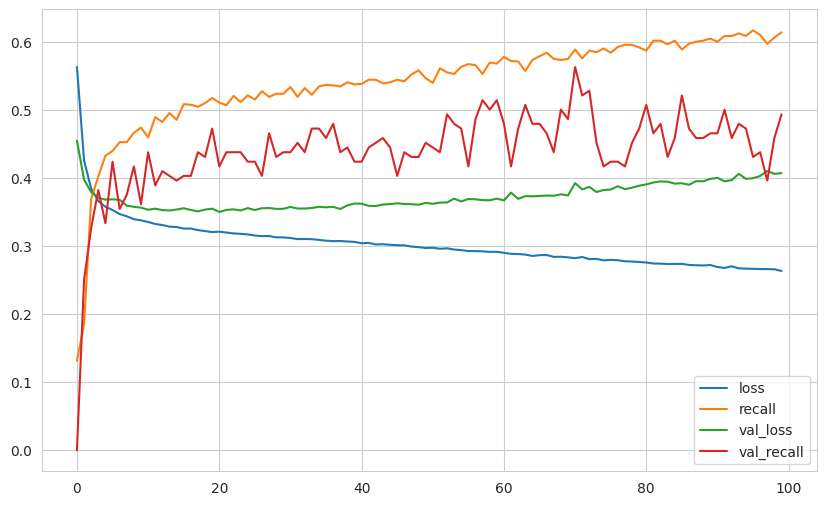

In [46]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 1.0)

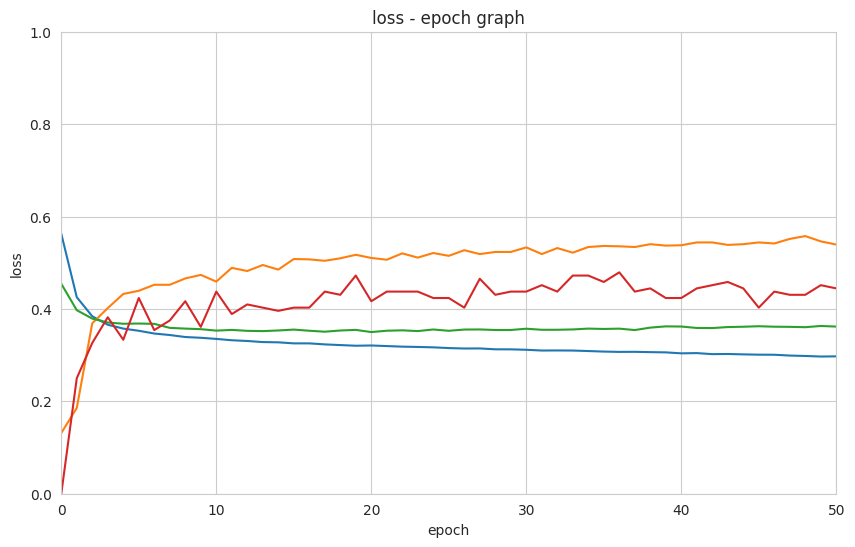

In [47]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 50])  # focusing on the given x values
ax.set_ylim([0, 1])  # focusing on the given y values

In [48]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [49]:
y_pred= (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [50]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
4132,0,0
8570,0,0
8889,0,0
3184,1,0
6940,0,0
2760,0,0
3643,0,1
4344,0,0
7013,0,0
4193,0,0


In [51]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2416
           1       0.63      0.55      0.59       584

    accuracy                           0.85      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.84      0.85      0.85      3000



In [52]:
print(confusion_matrix(y_test, y_pred))

[[2231  185]
 [ 263  321]]


In [53]:
x_pred = model.predict(X_train)

219/219 [==============================] - 0s 2ms/step


In [54]:
x_pred= (model.predict(X_train) > 0.5).astype("int32")

219/219 [==============================] - 0s 2ms/step


In [55]:
print(classification_report(y_train,x_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5547
           1       0.77      0.65      0.70      1453

    accuracy                           0.89      7000
   macro avg       0.84      0.80      0.82      7000
weighted avg       0.88      0.89      0.88      7000



In [56]:
print(confusion_matrix(y_train , x_pred))

[[5271  276]
 [ 515  938]]


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [57]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [71]:
from sklearn.utils import class_weight

In [72]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.63
Weight for class 1: 2.45


In [73]:
model_weighted = Sequential()

model_weighted.add(Dense(36, activation = "relu"))
model_weighted.add(Dense(18, activation = "relu"))
model_weighted.add(Dense(9, activation="relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))

In [74]:
model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [75]:
class_weight = {0: 0.623, 1: 2.45}

In [76]:
# Compile and train the model with class weights
model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model_weighted.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=40, epochs=100 , class_weight=class_weight)

Epoch 1/100
158/158 [==============================] - 2s 4ms/step - loss: 0.6498 - recall: 0.4691 - val_loss: 0.5379 - val_recall: 0.6667
Epoch 2/100
158/158 [==============================] - 0s 3ms/step - loss: 0.5724 - recall: 0.7578 - val_loss: 0.5569 - val_recall: 0.7708
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 0.5381 - recall: 0.7662 - val_loss: 0.5014 - val_recall: 0.7292
Epoch 4/100
158/158 [==============================] - 0s 3ms/step - loss: 0.5158 - recall: 0.7876 - val_loss: 0.4816 - val_recall: 0.7222
Epoch 5/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4958 - recall: 0.7922 - val_loss: 0.4784 - val_recall: 0.7222
Epoch 6/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4830 - recall: 0.7838 - val_loss: 0.4761 - val_recall: 0.7431
Epoch 7/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4759 - recall: 0.8029 - val_loss: 0.4866 - val_recall: 0.7569
Epoch 8/100
158/158 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

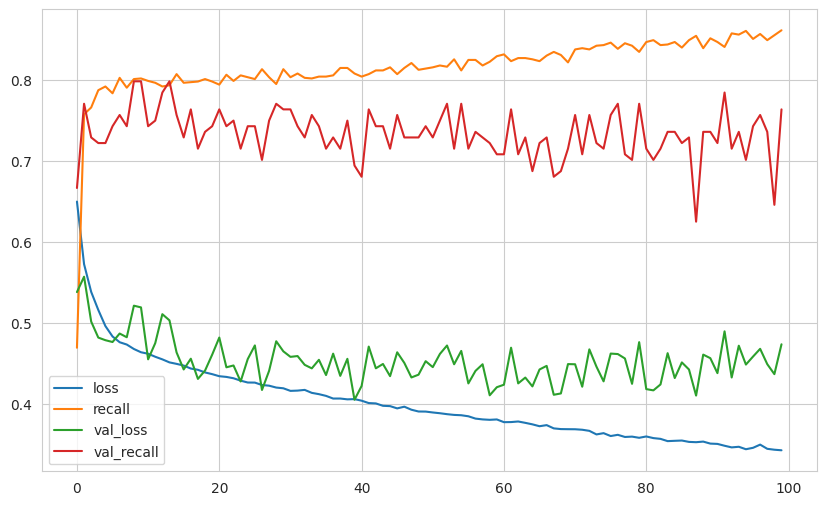

In [77]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.plot()

In [78]:
loss, Recall = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5109865665435791
Recall:  0.7191780805587769


In [79]:
y_pred = model_weighted.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1869  547]
 [ 164  420]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2416
           1       0.43      0.72      0.54       584

    accuracy                           0.76      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.76      0.78      3000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [81]:
from tensorflow.keras.optimizers import Adam

In [82]:
LR_model = Sequential()

LR_model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
LR_model.add(Dense(18, activation="relu"))
LR_model.add(Dense(9, activation="relu"))
LR_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
LR_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
#early_stop = EarlyStopping( monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [83]:
LR_model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=40,
    epochs=100,
    verbose=1,
    class_weight=class_weight
)

Epoch 1/100
158/158 [==============================] - 2s 6ms/step - loss: 0.5629 - recall: 0.7311 - val_loss: 0.4574 - val_recall: 0.6944
Epoch 2/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4848 - recall: 0.7617 - val_loss: 0.4431 - val_recall: 0.6944
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4689 - recall: 0.7609 - val_loss: 0.4971 - val_recall: 0.7431
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.4585 - recall: 0.7693 - val_loss: 0.4669 - val_recall: 0.7222
Epoch 5/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4530 - recall: 0.7846 - val_loss: 0.4607 - val_recall: 0.7292
Epoch 6/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4492 - recall: 0.7876 - val_loss: 0.4944 - val_recall: 0.7917
Epoch 7/100
158/158 [==============================] - 0s 3ms/step - loss: 0.4426 - recall: 0.8060 - val_loss: 0.4358 - val_recall: 0.7569
Epoch 8/100
158/158 [======

<Axes: >

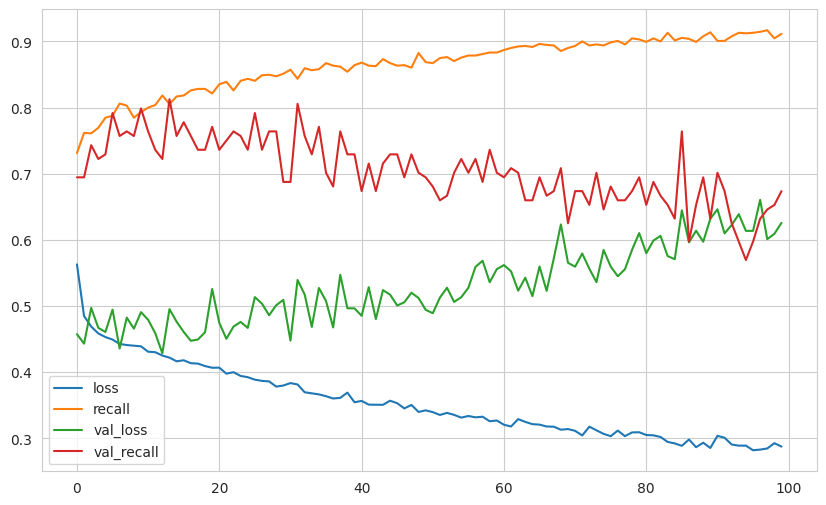

In [84]:
loss_df = pd.DataFrame(LR_model.history.history)
loss_df.plot()

In [85]:
loss, Recall = LR_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.6065274477005005
Recall:  0.6883561611175537


In [86]:
y_pred = LR_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1868  548]
 [ 182  402]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2416
           1       0.42      0.69      0.52       584

    accuracy                           0.76      3000
   macro avg       0.67      0.73      0.68      3000
weighted avg       0.82      0.76      0.78      3000



### Add Dropout Layer

In [87]:
from tensorflow.keras.layers import Dropout

In [88]:
Dout_model = Sequential()

Dout_model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
Dout_model.add(Dropout(0.5))

Dout_model.add(Dense(18, activation="relu"))
Dout_model.add(Dropout(0.5))

Dout_model.add(Dense(9, activation="relu"))
Dout_model.add(Dropout(0.5))

Dout_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
Dout_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [90]:
Dout_model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=40, epochs=100, verbose=1,class_weight=class_weight
)

Epoch 1/100
158/158 [==============================] - 1s 4ms/step - loss: 0.6987 - recall: 0.7433 - val_loss: 0.6926 - val_recall: 0.9097
Epoch 2/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6799 - recall: 0.5974 - val_loss: 0.6659 - val_recall: 0.7361
Epoch 3/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6634 - recall: 0.5164 - val_loss: 0.6388 - val_recall: 0.7222
Epoch 4/100
158/158 [==============================] - 1s 3ms/step - loss: 0.6404 - recall: 0.5623 - val_loss: 0.5878 - val_recall: 0.5903
Epoch 5/100
158/158 [==============================] - 0s 3ms/step - loss: 0.6240 - recall: 0.5615 - val_loss: 0.5784 - val_recall: 0.6875
Epoch 6/100
158/158 [==============================] - 0s 3ms/step - loss: 0.6181 - recall: 0.5577 - val_loss: 0.5715 - val_recall: 0.6042
Epoch 7/100
158/158 [==============================] - 0s 3ms/step - loss: 0.6099 - recall: 0.5531 - val_loss: 0.5539 - val_recall: 0.6875
Epoch 8/100
158/158 [======

<Axes: >

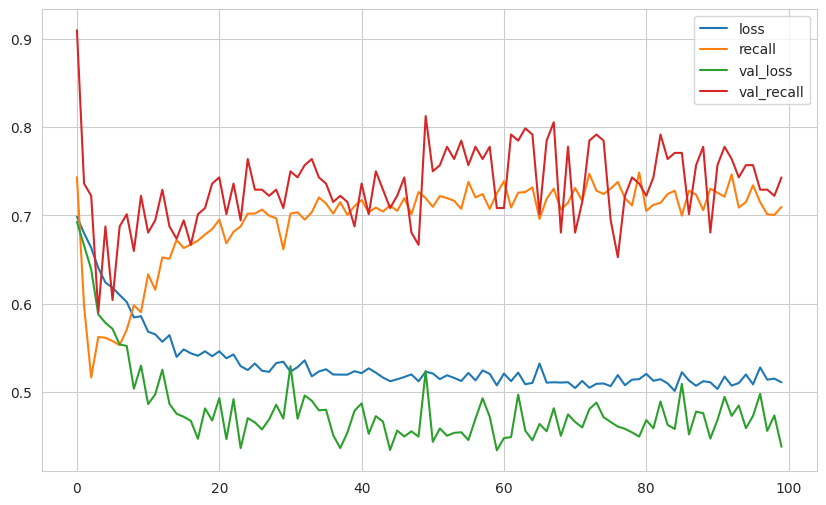

In [91]:
loss_df = pd.DataFrame(Dout_model.history.history)
loss_df.plot()

In [92]:
loss, Recall = Dout_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4311175048351288
Recall:  0.7517123222351074


In [93]:
y_pred = Dout_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1922  494]
 [ 145  439]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2416
           1       0.47      0.75      0.58       584

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.80      3000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
ES_model = Sequential()

ES_model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))


ES_model.add(Dense(18, activation="relu"))


ES_model.add(Dense(9, activation="relu"))


ES_model.add(Dense(1, activation="sigmoid"))

ES_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [100]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [101]:
ES_model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=40,
    epochs=100,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/100
158/158 [==============================] - 2s 6ms/step - loss: 0.6343 - recall: 0.3476 - val_loss: 0.4826 - val_recall: 0.0000e+00
Epoch 2/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4486 - recall: 0.0535 - val_loss: 0.4187 - val_recall: 0.2639
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.4122 - recall: 0.2934 - val_loss: 0.3990 - val_recall: 0.3681
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3840 - recall: 0.4125 - val_loss: 0.3817 - val_recall: 0.4167
Epoch 5/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3639 - recall: 0.4469 - val_loss: 0.3762 - val_recall: 0.3333
Epoch 6/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3541 - recall: 0.4385 - val_loss: 0.3727 - val_recall: 0.3889
Epoch 7/100
158/158 [==============================] - 0s 3ms/step - loss: 0.3478 - recall: 0.4645 - val_loss: 0.3692 - val_recall: 0.3542
Epoch 8/100
158/158 [==

In [102]:
loss, Recall = ES_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.33574438095092773
Recall:  0.4931506812572479


In [103]:
y_pred = ES_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 3ms/step
[[2302  114]
 [ 296  288]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.49      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



## Optuna

In [105]:
!pip install optuna

In [106]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [107]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [108]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    Op_model = Sequential()
    Op_model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    Op_model.add(Dense(n_units2, activation="relu"))
    Op_model.add(Dense(1, activation="sigmoid"))
    Op_model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    models = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    models.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = models.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [109]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 20:35:37,052] A new study created in memory with name: no-name-298cf87a-05f9-4c17-9128-89d4c0cf67db
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 44.
Epoch 59: early stopping


[I 2023-10-30 20:36:00,519] Trial 0 finished with value: 0.9503424763679504 and parameters: {'n_units1': 48, 'n_units2': 83, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 5.2054720204721876e-05, 'w0': 0.01742792987335948, 'w1': 3.881599788883383}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 33.
Epoch 48: early stopping


[I 2023-10-30 20:36:42,202] Trial 1 finished with value: 0.16780821979045868 and parameters: {'n_units1': 55, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 3.5171236194048456e-05, 'w0': 1.0738150492274643, 'w1': 0.011414802528545159}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 24.
Epoch 39: early stopping


[I 2023-10-30 20:37:03,064] Trial 2 finished with value: 0.22431506216526031 and parameters: {'n_units1': 125, 'n_units2': 57, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007078636540684867, 'w0': 0.5282649825971725, 'w1': 0.01193190613655463}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 20:37:13,636] Trial 3 finished with value: 0.4537671208381653 and parameters: {'n_units1': 99, 'n_units2': 60, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.06233661563550156, 'w0': 3.735524704679086, 'w1': 1.9966586294066226}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 20:37:24,182] Trial 4 finished with value: 0.20376712083816528 and parameters: {'n_units1': 52, 'n_units2': 93, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.6287067187651775e-05, 'w0': 1.402721945233963, 'w1': 0.07509542166053686}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 58.
Epoch 73: early stopping


[I 2023-10-30 20:38:05,460] Trial 5 finished with value: 0.7756849527359009 and parameters: {'n_units1': 70, 'n_units2': 62, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.6025403954085703e-05, 'w0': 0.03468250371124692, 'w1': 0.36282216729384614}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 48.
Epoch 63: early stopping


[I 2023-10-30 20:38:28,564] Trial 6 finished with value: 0.2414383590221405 and parameters: {'n_units1': 32, 'n_units2': 30, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.59767573759781e-05, 'w0': 1.6110588526231922, 'w1': 0.014692695113215701}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 20:38:39,284] Trial 7 finished with value: 0.6215753555297852 and parameters: {'n_units1': 8, 'n_units2': 29, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.030096401272447237, 'w0': 0.04378001413963219, 'w1': 0.14301893427170584}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 20:38:46,365] Trial 8 finished with value: 0.6900684833526611 and parameters: {'n_units1': 106, 'n_units2': 127, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.000725331022319286, 'w0': 0.04591253857382922, 'w1': 0.2811897524432985}. Best is trial 0 with value: 0.9503424763679504.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 20:38:55,811] Trial 9 finished with value: 0.625 and parameters: {'n_units1': 12, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00012783659975565273, 'w0': 0.03496391190597681, 'w1': 0.11709975581242633}. Best is trial 0 with value: 0.9503424763679504.


{'n_units1': 48,
 'n_units2': 83,
 'optimizer': keras.src.optimizers.adadelta.Adadelta,
 'learning_rate': 5.2054720204721876e-05,
 'w0': 0.01742792987335948,
 'w1': 3.881599788883383}

In [113]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

optuna_model = Sequential()
optuna_model.add(Dense(unit1, activation="relu"))
optuna_model.add(Dense(unit2, activation="relu"))
optuna_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
optuna_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
optuna_model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=40,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
    class_weight=class_weight
)

Epoch 1/100
158/158 [==============================] - 2s 4ms/step - loss: 0.7123 - recall: 0.8908 - val_loss: 0.8083 - val_recall: 0.9236
Epoch 2/100
158/158 [==============================] - 0s 3ms/step - loss: 0.7122 - recall: 0.8908 - val_loss: 0.8082 - val_recall: 0.9236
Epoch 3/100
158/158 [==============================] - 0s 3ms/step - loss: 0.7122 - recall: 0.8908 - val_loss: 0.8080 - val_recall: 0.9236
Epoch 4/100
158/158 [==============================] - 0s 3ms/step - loss: 0.7121 - recall: 0.8908 - val_loss: 0.8079 - val_recall: 0.9236
Epoch 5/100
158/158 [==============================] - 0s 3ms/step - loss: 0.7121 - recall: 0.8908 - val_loss: 0.8078 - val_recall: 0.9236
Epoch 6/100
158/158 [==============================] - 0s 3ms/step - loss: 0.7120 - recall: 0.8908 - val_loss: 0.8076 - val_recall: 0.9236
Epoch 7/100
158/158 [==============================] - 0s 3ms/step - loss: 0.7120 - recall: 0.8908 - val_loss: 0.8075 - val_recall: 0.9236
Epoch 8/100
158/158 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [115]:
history = optuna_model.history.history

In [116]:
y_pred = (optuna_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[ 307 2109]
 [  60  524]]
              precision    recall  f1-score   support

           0       0.84      0.13      0.22      2416
           1       0.20      0.90      0.33       584

    accuracy                           0.28      3000
   macro avg       0.52      0.51      0.27      3000
weighted avg       0.71      0.28      0.24      3000



94/94 [==============================] - 1s 5ms/step


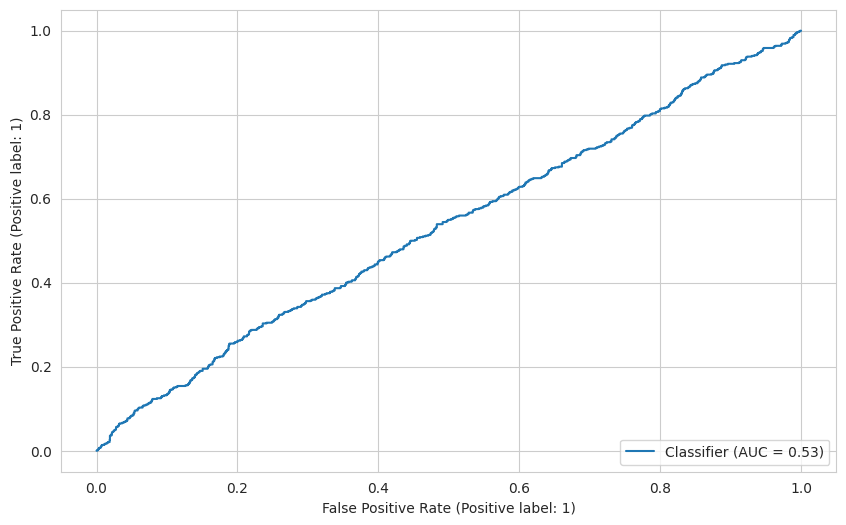

In [118]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = optuna_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Final Model and Model Deployment

###Save Scaler

In [119]:
import pickle

pickle.dump(scaler, open("scaler_Churn", "wb"))

In [121]:
loss, Recall = Dout_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4311175048351288
Recall:  0.7517123222351074


In [123]:
y_pred = Dout_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1922  494]
 [ 145  439]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2416
           1       0.47      0.75      0.58       584

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.80      3000



###Save Model

In [124]:
Dout_model.save("model_Churn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Loading Model and Scaler

In [125]:
from tensorflow.keras.models import load_model

In [126]:
model_Churn = load_model("model_Churn.h5")
scaler_Churn = pickle.load(open("scaler_Churn", "rb"))

## Prediction

In [127]:
single_Churn = df.drop("Exited", axis=1).iloc[0:1, :]
single_Churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1.000,0.000,0.000,1.000,0.000


In [128]:
single_Churn =scaler_Churn.transform(single_Churn)
single_Churn

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.64609167,  0.97024255,  0.02188649,  0.99720391, -0.57873591,
        -0.57380915,  1.09598752, -1.09598752]])

In [129]:
(model_Churn.predict(single_Churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 91ms/step


array([[1]], dtype=int32)

In [130]:
df["Exited"].iloc[0]

1

#What’s Next

We'll check out the proven way to improve the performance(Speed and Accuracy both) of neural network models:


Increase hidden Layers.


Change Activation function.

Change Activation function in Output layer.

Increase number of neurons.

Weight initialization.


More data.

Normalizing/Scaling data.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___